This notebook looks at the downloaded MNIST data and looks into the image dataloader and rolling window data class.  
Notably, this code is modified from the original code written by [original code](https://github.com/xqding/TD-VAE/blob/master/script/download_MNIST.py) by Xinqiang Ding <xqding@umich.edu> 

In [1]:
import pathlib
import sys

# mnist data parser import
import mnist
import numpy as np
import pandas as pd

sys.path.append("../../utils")

import pickle

import matplotlib.pyplot as plt
from prep_data import MNIST_Dataset
from torch.utils.data import DataLoader

In [2]:
# open the data
# set path to the data
mnist_pickle_path = pathlib.Path("../../data/mnist/MNIST.pkl").resolve(strict=True)

with open(mnist_pickle_path, "rb") as file_handle:
    MNIST = pickle.load(file_handle)

In [3]:
# get the MNIST data keys
print(MNIST.keys())
MNIST["train_image"][0].shape

dict_keys(['train_image', 'train_label', 'test_image', 'test_label'])


(28, 28)

In [4]:
# set the batch size
batch_size = 8

# create the data class
# this class makes a rolling window of the data
data = MNIST_Dataset(
    MNIST["train_image"], MNIST["train_label"], binary=False, number_of_frames=20
)
# create the data loader
data_loader = DataLoader(data, batch_size=batch_size, shuffle=True)
# get the first batch of data
batch, sample = next(enumerate(data_loader))

In [5]:
idx = sample[0]
images = sample[1]["image"]
labels = sample[1]["label"]
print(f"{len(idx)} images in the batch")
print(f"labels: {labels.shape}")
print(f"images: {images.shape}")

8 images in the batch
labels: torch.Size([8, 20, 1])
images: torch.Size([8, 20, 784])


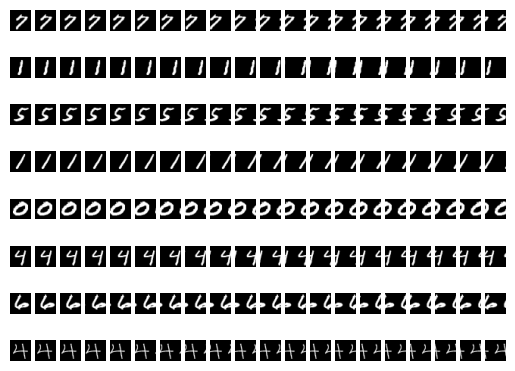

In [6]:
# get the number of images in the sequence
images_in_seq = images[0].shape[0]
# loop through each image (i) and each frame (j) and plot the image
for i in range(batch_size):
    for j in range(images_in_seq):
        # plot the image
        plt.subplot(batch_size, images_in_seq, i * images_in_seq + j + 1)
        # plot the image in gray scale
        plt.imshow(images[i][j].reshape(28, 28), cmap="gray")
        plt.axis("off")
plt.show()

Ahh, yes. We are ready to begin a journey in time....